<a href="https://colab.research.google.com/github/nkurinsky/THz-FTS/blob/master/python/Notebooks/BBspectrum_FTS_(arbitrary_FrequencyList).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this file is an attempt at using an arbitrary list of frequencies for as the inputs the blackbody signal. This would resolve an issue where the total power is not correct due to different sized integration slices and separation between evaluation points. This file was created on April 16, 2020.

In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
from scipy.signal import get_window
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/BREAD Experiment/FTS Modeling/lib/')
from BlackbodyFunctions import *
from FTSFunctions import *

Motorized stage details (https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2163): 


*   Max Velocity = 2.6 mm/s
*   Max Travel Range = 12mm (12e3 µm)
*   Minimum Step Size = 0.10 µm

Review this document for understanding of how FTS works/ data looks: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Fundamentals_of_Spectroscopy/The_Power_of_the_Fourier_Transform_for_Spectroscopists

### Want to compare different signals on the order of our expected magnitude: 

*   Source off (noise on the order of 2e-8  W)
*   Source on (blackbody spectrum with noise on the order of 1e-7W)

the length of the frequencies list is  149999


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

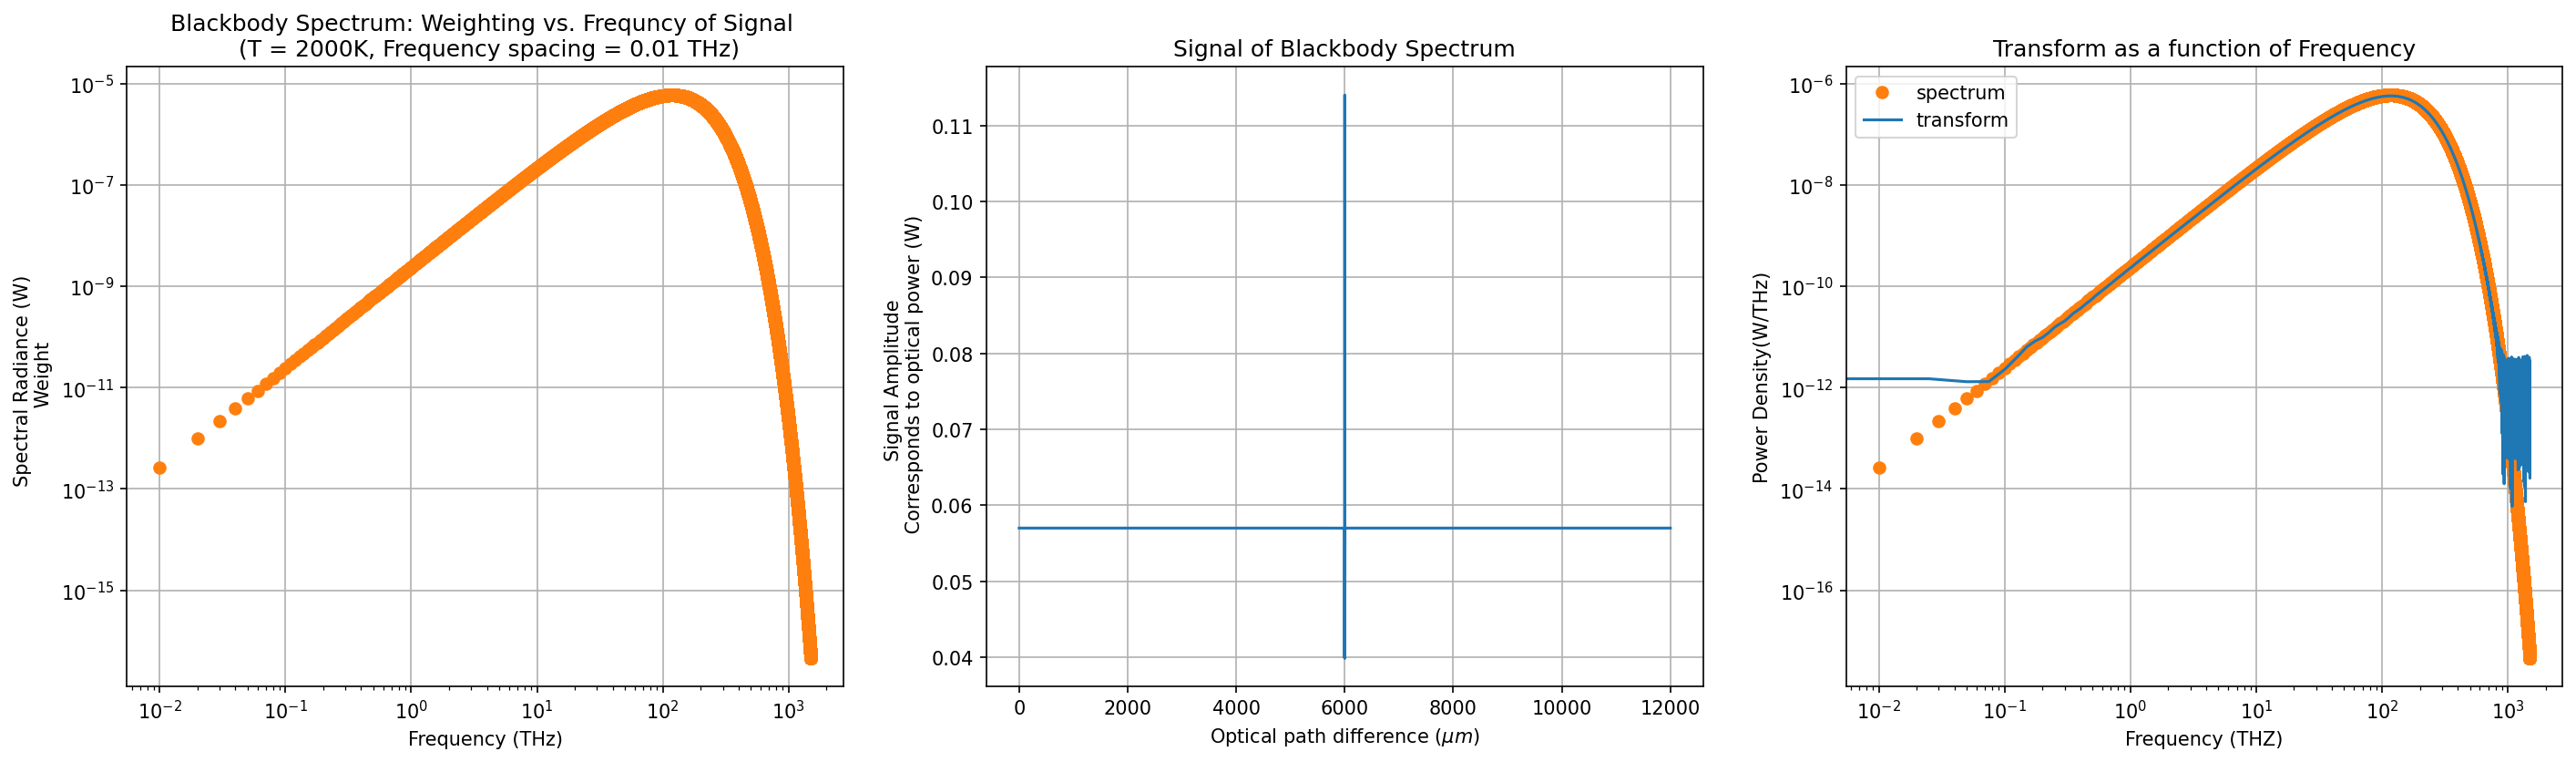

In [0]:
c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12
lambda_or_nu = False

fig = plt.figure(figsize=(23, 6), dpi=150)  

#for blackbody spectrum, decide frequeny range and number of frequency slices 
min_frequency = 0.1 #THz
max_frequency = 1500 #THz
frequency_slice_size = 0.01  #THz 
frequencies = arange(frequency_slice_size, max_frequency, frequency_slice_size) #still in THz (use min as frequency slice size)
print("the length of the frequencies list is ", len(frequencies))

x,y,weights_nofilter = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='no', sigma = 2e-8)

plt.subplot(1, 3, 1)
plt.plot(frequencies, weights_nofilter , 'o', color='C1')

plt.subplot(1, 3, 2)
plt.plot(x,y, color='C0')


plt.subplot(1, 3, 3)
frequency, spectrum_nofilter = psd_frequency(y, 'parzen')
df = (frequencies[1] - frequencies[0])/Hz_to_THz
plt.semilogy(frequencies, weights_nofilter/df*1e9, 'o', label = 'spectrum', color='C1')
plt.semilogy(frequency, spectrum_nofilter, label='transform', color='C0')

#plot details for blackbody spectrum plot
plt.subplot(1, 3, 1)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(1, 3, 2)
plt.grid(True)
#plt.yscale('log')
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(1, 3, 3)
plt.title("Transform as a function of Frequency")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Power Density(W/THz)")
plt.show()

Text(0, 0.5, 'Signal Amplitude \n Corresponds to optical power (W)')

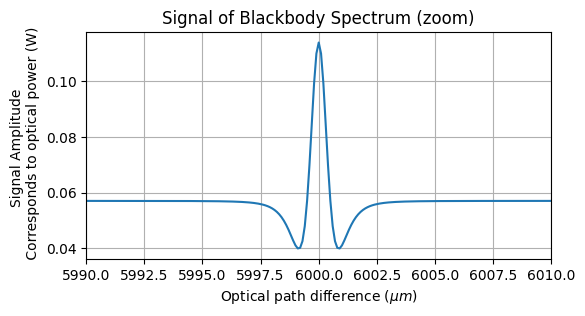

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)
plt.plot(x,y, color='C0')
#plot details for signal plot
plt.grid(True)
plt.xlim(5990,6010)
plt.title("Signal of Blackbody Spectrum (zoom)")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

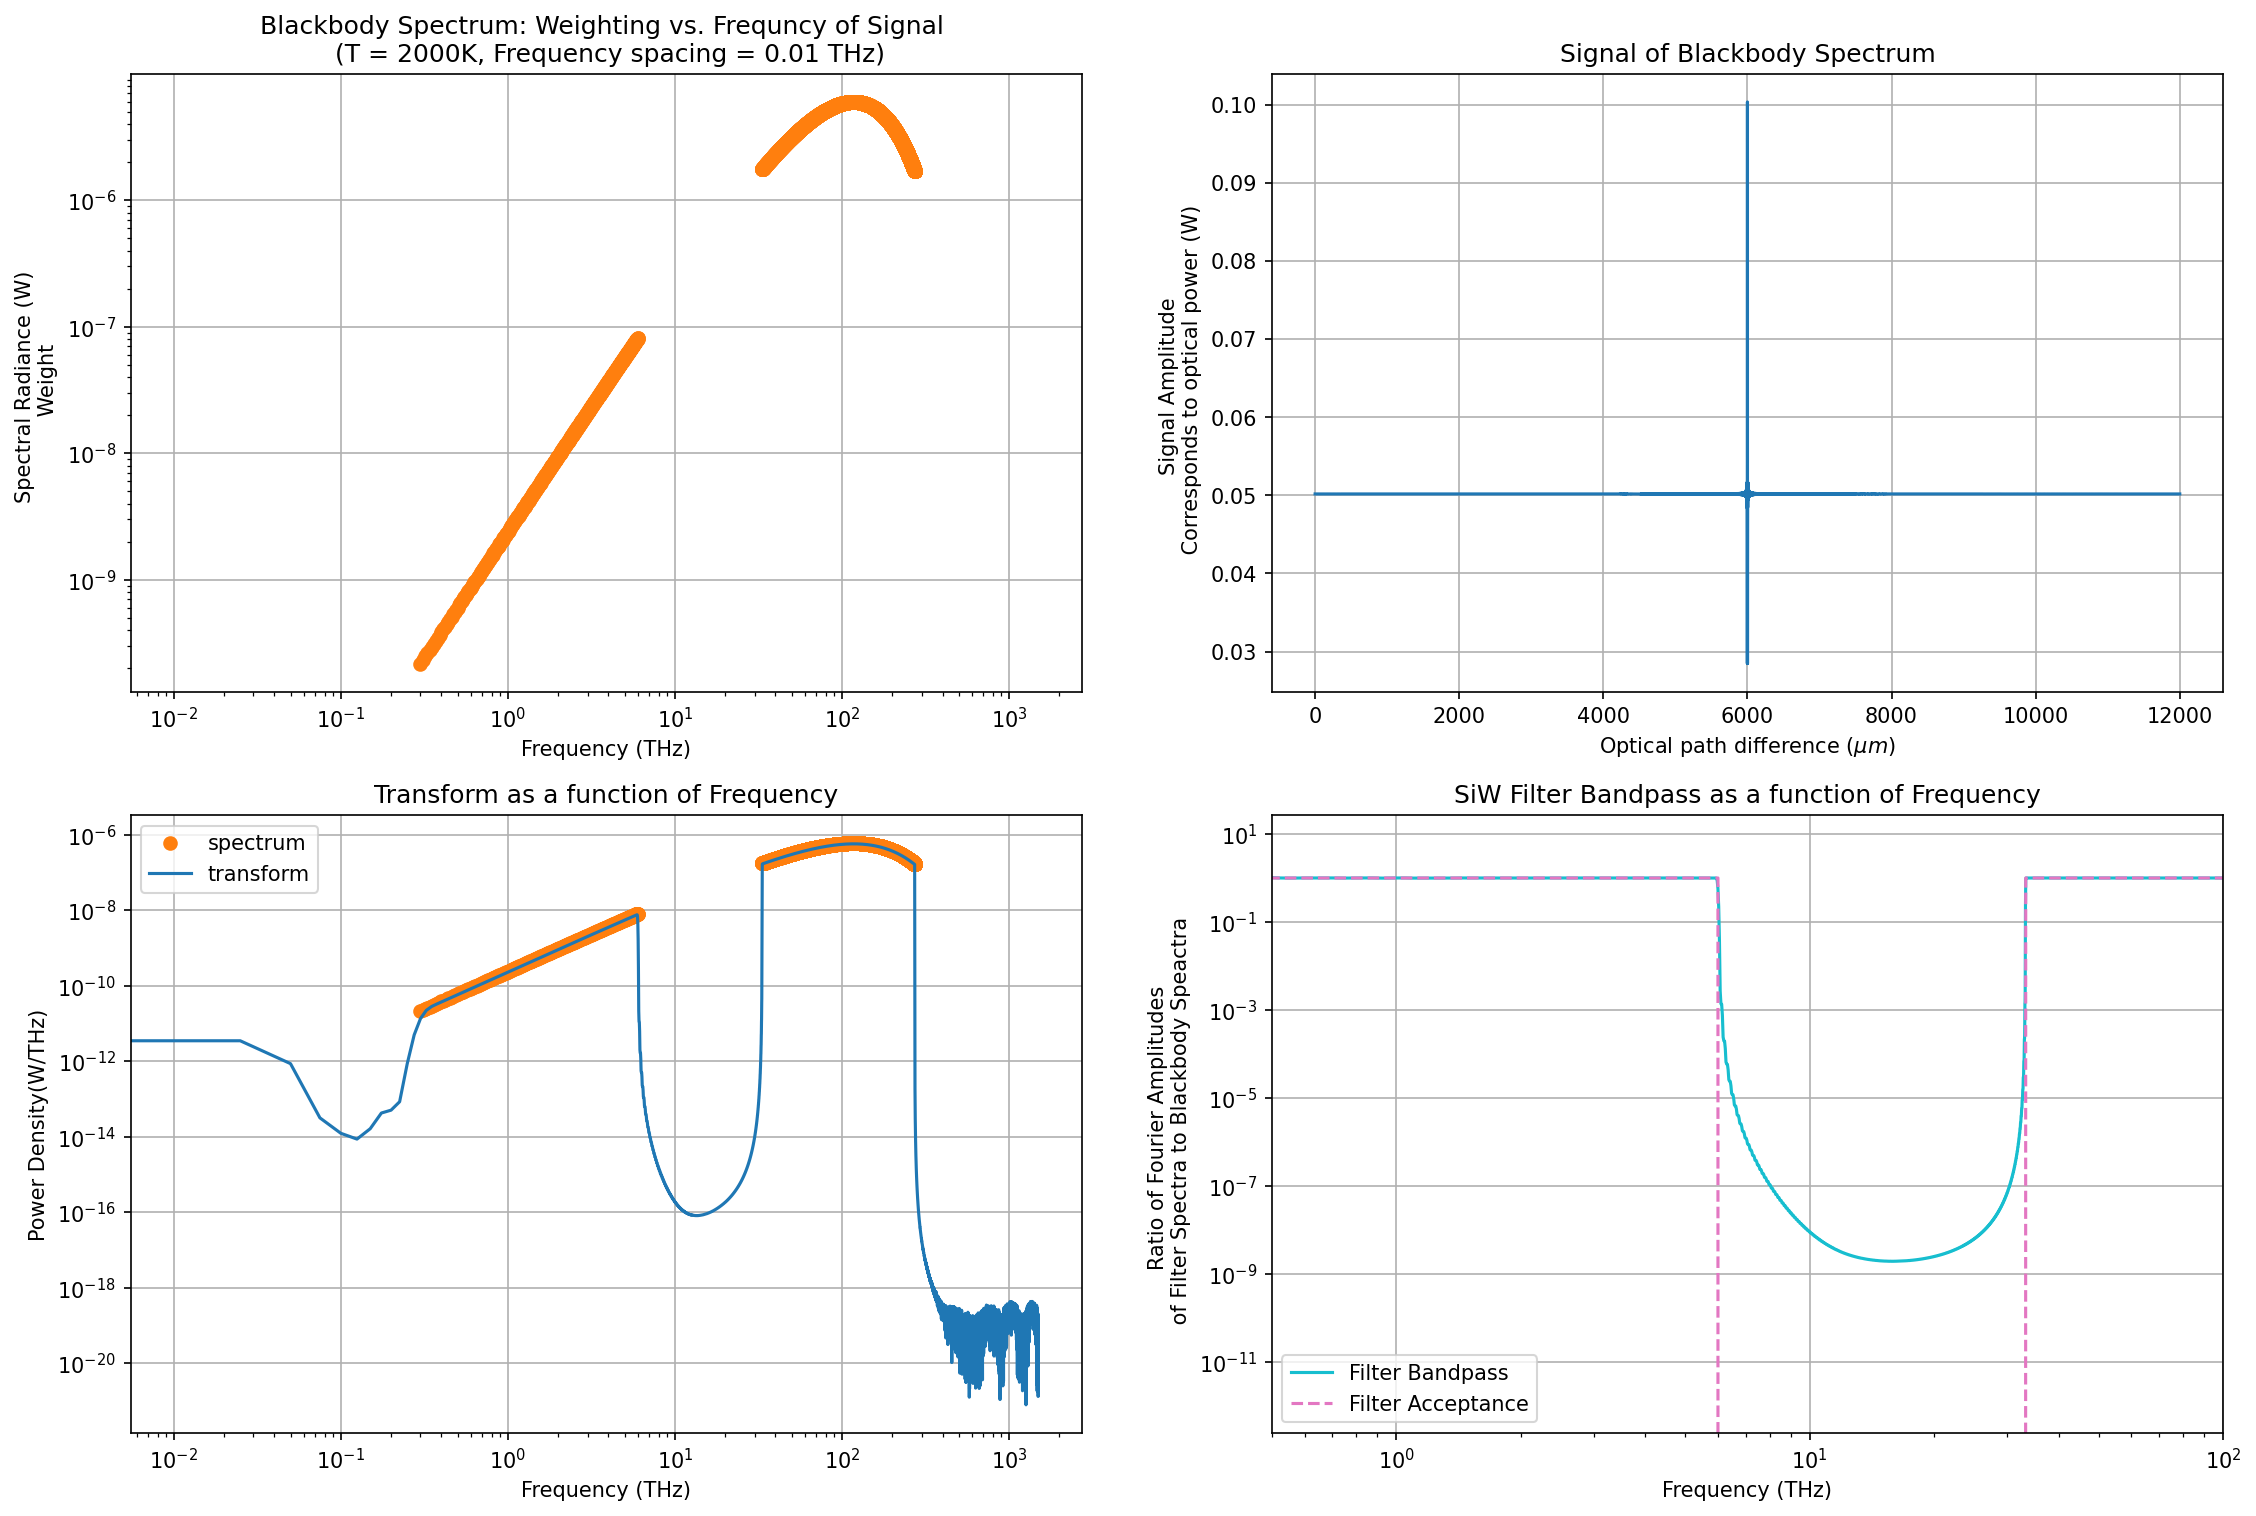

In [0]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='SiW')

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(frequencies, weights,  'o', color='C1')

plt.subplot(2, 2, 2)
plt.plot(x,y_filter)

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_filter, 'parzen')
plt.semilogy(frequencies, weights/df*1e9, 'o', label = 'spectrum', color='C1')
plt.semilogy(frequency, spectrum, label='transform', color='C0')

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter, label = "Filter Bandpass", color='C9')
plt.semilogy(frequencies, filter_val, '--', label = 'Filter Acceptance', color='C6')

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Power Density(W/THz)")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("SiW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

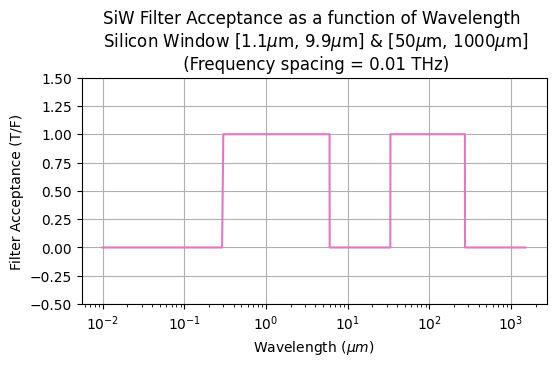

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(frequencies, filter_val, Color = 'C6')
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "SiW Filter Acceptance as a function of Wavelength \n Silicon Window [1.1$\mu$m, 9.9$\mu$m] & [50$\mu$m, 1000$\mu$m] \n (Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()

Text(0, 0.5, 'Signal Amplitude \n Corresponds to optical power (W)')

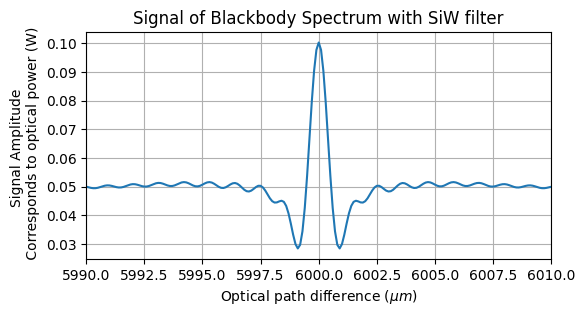

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)
plt.plot(x,y_filter, color='C0')
#plot details for signal plot
plt.grid(True)
plt.xlim(5990,6010)
plt.title("Signal of Blackbody Spectrum with SiW filter")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

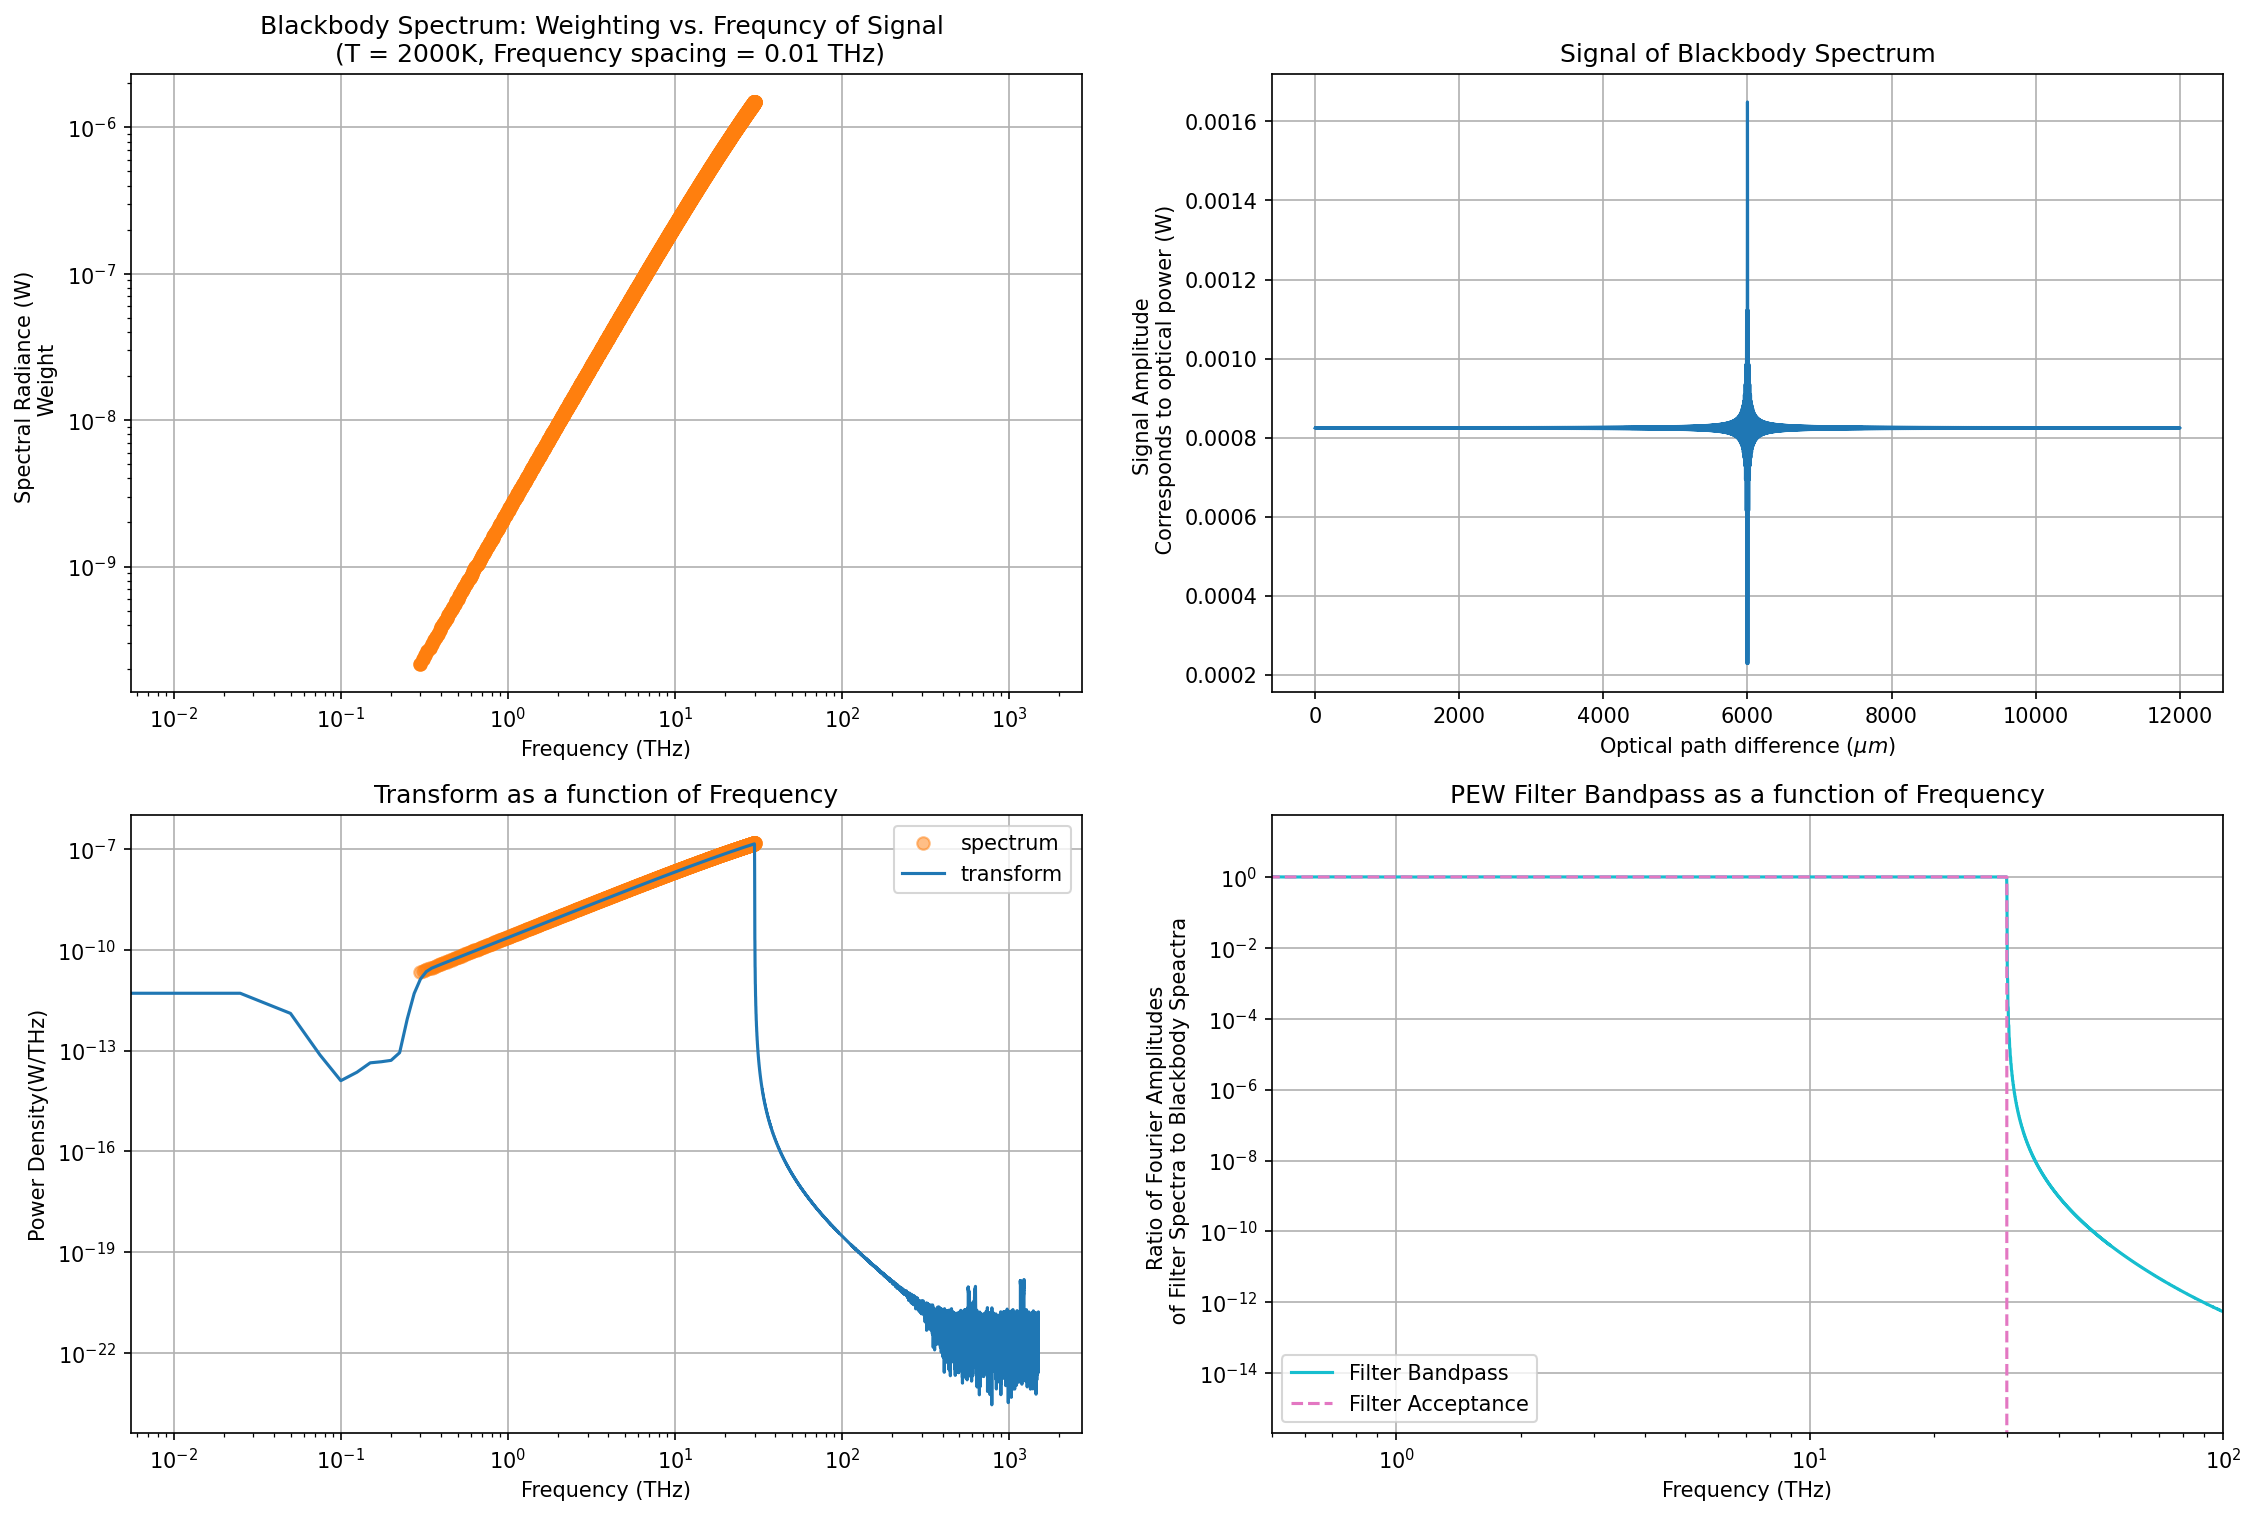

In [0]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='PEW')

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(frequencies, weights, 'o', color='C1')

plt.subplot(2, 2, 2)
plt.plot(x,y_filter,  color='C0')

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_filter, 'parzen')
plt.semilogy(frequencies, weights/df*1e9, 'o', alpha = 0.5, color='C1', label = 'spectrum')
plt.semilogy(frequency, spectrum, color ='C0',label='transform')

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter, label = "Filter Bandpass", Color = 'C9')
plt.semilogy(frequencies, filter_val, '--', label = 'Filter Acceptance', Color = 'C6')

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Power Density(W/THz)")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("PEW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

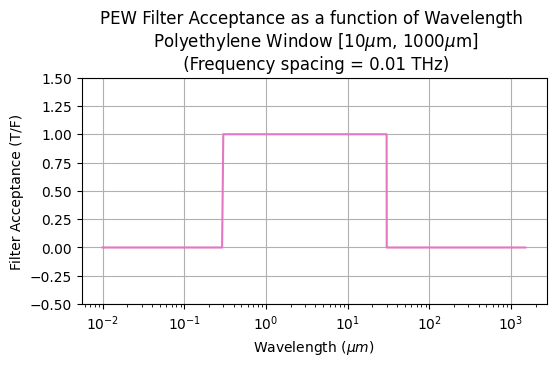

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(frequencies, filter_val, Color = 'C6')
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "PEW Filter Acceptance as a function of Wavelength \n Polyethylene Window [10$\mu$m, 1000$\mu$m] \n (Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()

Text(0, 0.5, 'Signal Amplitude \n Corresponds to optical power (W)')

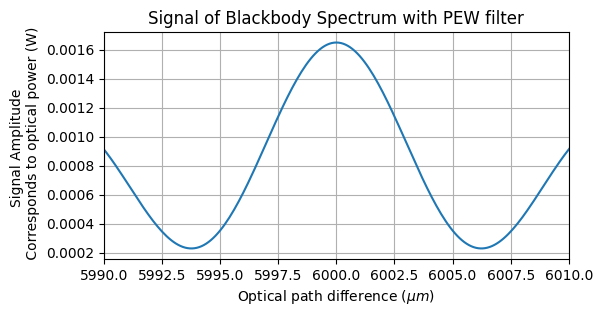

In [0]:
fig = plt.figure(figsize=(6, 3), dpi=100)
plt.plot(x,y_filter, color='C0')
#plot details for signal plot
plt.grid(True)
plt.xlim(5990,6010)
plt.title("Signal of Blackbody Spectrum with PEW filter")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")